## Libiraries & Preprocessing
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Define the file path for ratings
ratings_file_path = r'D:\Downloads\ml-10m\ml-10M100K\ratings.dat'

# Load the ratings data into a Pandas DataFrame
ratings = pd.read_csv(ratings_file_path, sep="::", engine="python", names=["UserID", "MovieID", "Rating", "Timestamp"])

# Display basic information
print(f"Ratings Data Shape: {ratings.shape}")
ratings.head()


Ratings Data Shape: (10000054, 4)


,UserID,MovieID,Rating,Timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [4]:
# Define the file path for tags
tags_file_path = r'D:\Downloads\ml-10m\ml-10M100K\tags.dat'

# Load the tags data into a Pandas DataFrame
tags = pd.read_csv(tags_file_path, sep="::", engine="python", names=["UserID", "MovieID", "Tag", "Timestamp"])

# Display basic information
print(f"Tags Data Shape: {tags.shape}")
tags.head()


Tags Data Shape: (95580, 4)


,UserID,MovieID,Tag,Timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835


In [5]:
# Define the file path for movies
movies_file_path = r'D:\Downloads\ml-10m\ml-10M100K\movies.dat'

# Load the movies data into a Pandas DataFrame
movies = pd.read_csv(movies_file_path, sep="::", engine="python", names=["MovieID", "Title", "Genres"])

# Display basic information
print(f"Movies Data Shape: {movies.shape}")
movies.head()


Movies Data Shape: (10681, 3)


,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# Remove duplicates from ratings, tags, and movies
ratings = ratings.drop_duplicates()
tags = tags.drop_duplicates()
movies = movies.drop_duplicates()

# Check for duplicates
print(f"Ratings Duplicates: {ratings.duplicated().sum()}")
print(f"Tags Duplicates: {tags.duplicated().sum()}")
print(f"Movies Duplicates: {movies.duplicated().sum()}")

# Convert timestamps to datetime
ratings['Timestamp'] = pd.to_datetime(ratings['Timestamp'], unit='s')
tags['Timestamp'] = pd.to_datetime(tags['Timestamp'], unit='s')

# Optional: Display the first few timestamps in readable format
print(ratings['Timestamp'].head())


# Check for missing values
print(f"Missing values in Ratings: {ratings.isnull().sum()}")
print(f"Missing values in Tags: {tags.isnull().sum()}")
print(f"Missing values in Movies: {movies.isnull().sum()}")

# Fill missing values or drop rows/columns if necessary
ratings = ratings.dropna()
tags = tags.dropna()
movies = movies.dropna()



Ratings Duplicates: 0
Tags Duplicates: 0
Movies Duplicates: 0
0   1996-08-02 11:24:06
1   1996-08-02 10:58:45
2   1996-08-02 10:56:32
3   1996-08-02 10:57:01
4   1996-08-02 10:56:32
Name: Timestamp, dtype: datetime64[ns]
Missing values in Ratings: UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64
Missing values in Tags: UserID        0
MovieID       0
Tag          16
Timestamp     0
dtype: int64
Missing values in Movies: MovieID    0
Title      0
Genres     0
dtype: int64


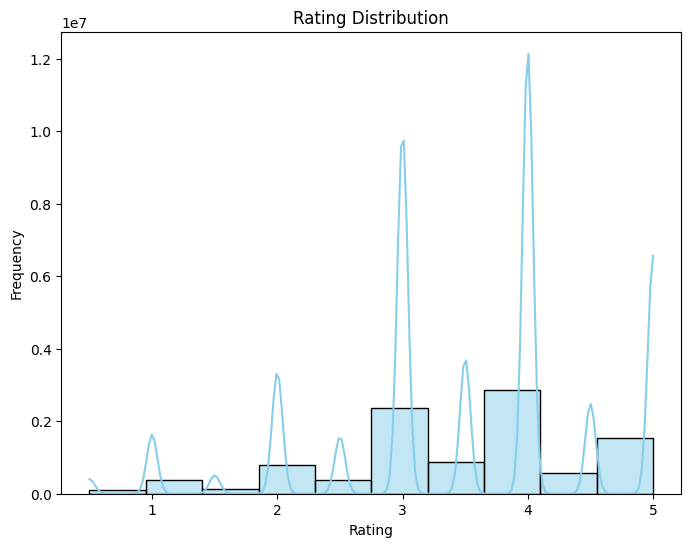

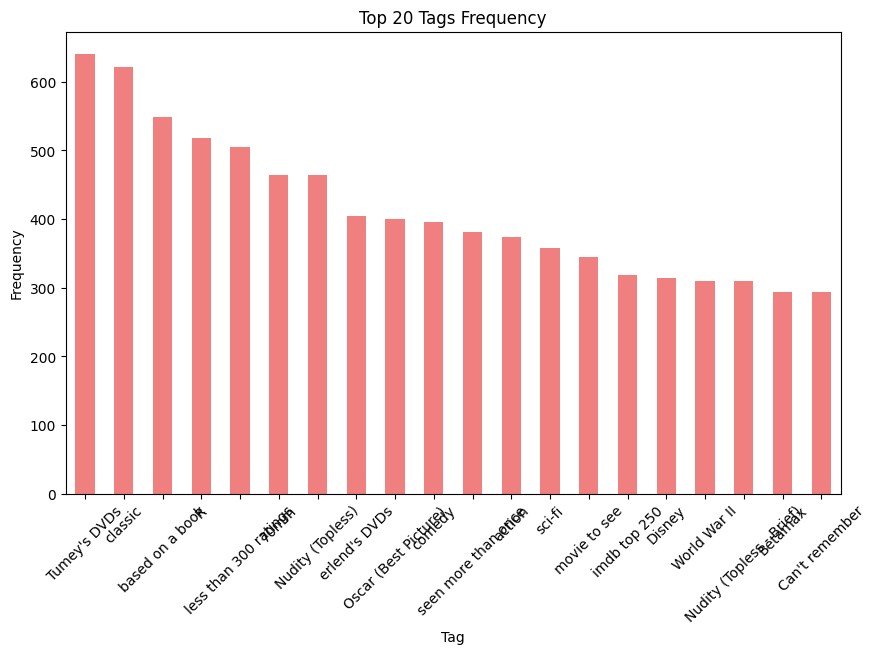

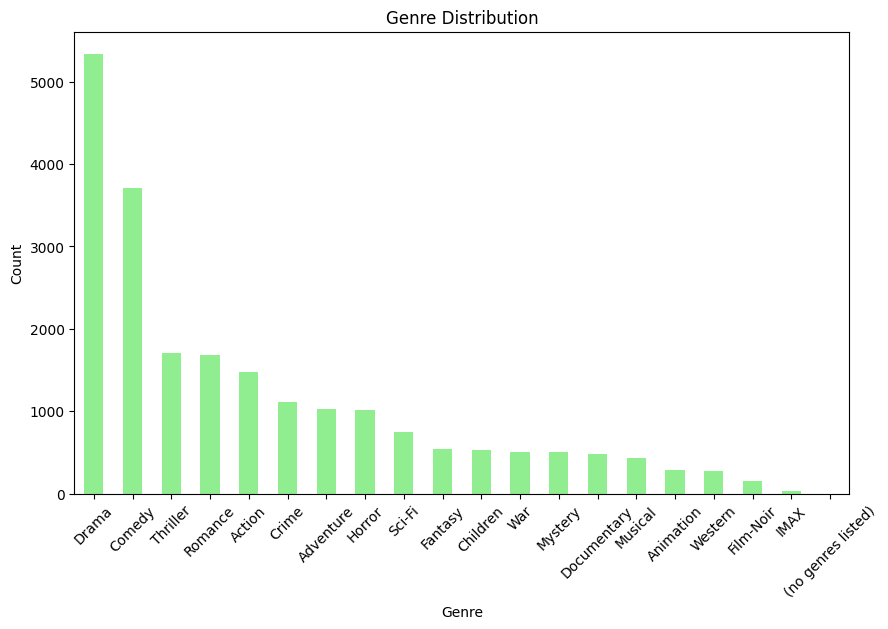

In [7]:
# Plot the rating distribution
plt.figure(figsize=(8, 6))
sns.histplot(ratings['Rating'], bins=10, kde=True, color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
# Plot the top 20 most frequent tags
top_tags = tags['Tag'].value_counts().head(20)
plt.figure(figsize=(10, 6))
top_tags.plot(kind='bar', color='lightcoral')
plt.title('Top 20 Tags Frequency')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
# Split genres into separate columns (one-hot encoding)
genres = movies['Genres'].str.split('|', expand=True).stack().reset_index(drop=True)
plt.figure(figsize=(10, 6))
genres.value_counts().plot(kind='bar', color='lightgreen')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Filtering & encoding

In [8]:
# Step 1: Filter out users who have not rated any movies (based on our original data)
active_users = ratings['UserID'].value_counts()[ratings['UserID'].value_counts() > 0].index

# Filter the ratings data to only include active users
filtered_ratings = ratings[ratings['UserID'].isin(active_users)]

# Step 2: Create the User-Item Interaction Matrix
user_item_matrix = filtered_ratings.pivot(index='UserID', columns='MovieID', values='Rating')

# Fill missing values (unrated movies) with 0 to represent no rating
user_item_matrix = user_item_matrix.fillna(0)

# Show the first few rows of the matrix
print(f"User-Item Matrix Shape: {user_item_matrix.shape}")


# Step 2: Apply SVD for dimensionality reduction
svd = TruncatedSVD(n_components=100, random_state=42)  # You can experiment with the number of components
svd_matrix = svd.fit_transform(user_item_matrix)

# Optional: If you'd like to examine the explained variance ratio
print(f"Explained Variance Ratio by SVD components: {svd.explained_variance_ratio_}")
print(f"Total variance explained: {sum(svd.explained_variance_ratio_)}")

# Now svd_pca_matrix has reduced dimensionality and can be used for further modeling
print(f"Original Matrix Shape: {user_item_matrix.shape}")
print(f"SVD Matrix Shape: {svd_matrix.shape}")

User-Item Matrix Shape: (69878, 10677)
Explained Variance Ratio by SVD components: [0.11871372 0.03710603 0.03044124 0.01853962 0.01776057 0.01292208
 0.01171864 0.01034643 0.00898387 0.00694314 0.00570117 0.0056266
 0.00496393 0.00480024 0.00457489 0.00412567 0.00399833 0.003815
 0.00369266 0.00342989 0.00334375 0.00324711 0.00317657 0.00283385
 0.00277581 0.00266285 0.0026399  0.00250143 0.00236399 0.00231534
 0.00218037 0.0021422  0.00209084 0.00199349 0.0019583  0.00190136
 0.00184771 0.00181611 0.00180553 0.00176096 0.00174451 0.00170235
 0.00168865 0.00164086 0.0016023  0.00159161 0.00156512 0.00153853
 0.00151704 0.00149218 0.00145177 0.00143653 0.00140971 0.00140506
 0.00139488 0.00135968 0.00134517 0.00132136 0.00131927 0.00131298
 0.00129544 0.00128752 0.00127006 0.0012495  0.0012438  0.00122678
 0.00121274 0.00120682 0.00120061 0.00117996 0.00117164 0.00115458
 0.00114004 0.00112701 0.00111806 0.00111113 0.00109417 0.0010776
 0.00107367 0.00105917 0.00105187 0.00103441 0.001

In [9]:
# Assuming svd_matrix is your NumPy array
svd_df = pd.DataFrame(svd_matrix)
svd_df.head()  # Now you can use .head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,4.618016,7.949208,1.461579,-1.048205,-0.561495,0.470045,-4.002420,-1.323979,1.991581,-0.201123,...,0.405761,-1.023735,0.430854,-0.898992,1.177976,0.663443,0.830899,2.079084,0.982012,-0.331636
1,3.268304,2.597333,0.200839,-0.604236,2.652791,1.020231,1.188944,4.182944,-2.022154,0.638680,...,0.441930,-0.506049,-0.629196,0.166453,-0.017660,1.187092,-0.286741,0.342210,0.265343,-0.118871
2,3.312876,-0.449696,1.339197,0.990524,-1.115254,1.216685,-1.597189,0.008179,-1.796330,0.543584,...,0.140546,-0.608604,-0.490691,-1.788796,-0.621499,1.300886,-0.383844,-0.124897,0.030751,0.273907
3,7.720898,14.744129,1.477778,-0.444297,-1.726934,-0.112061,-6.469464,-4.580958,1.833988,0.347628,...,-0.806028,-1.021227,0.610553,0.988297,0.949345,0.130115,-0.702681,0.796452,-1.463611,0.285560
4,10.064975,1.497213,-9.847932,7.260804,-1.477681,-1.027871,2.320698,6.885479,1.716404,1.437536,...,1.439405,-1.175059,0.314925,3.653586,-1.839581,1.270480,-1.424264,-1.659856,-1.010377,0.438201


In [10]:
# One-hot encode the genres
genres = movies['Genres'].str.get_dummies(sep='|')
movies_with_genres = pd.concat([movies, genres], axis=1)

# Example: Assign genre preferences to users (simplified)
user_genre_preferences = pd.merge(ratings, movies_with_genres, on='MovieID')
user_genre_preferences = user_genre_preferences.groupby('UserID')[genres.columns].mean()
user_genre_preferences.head()


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
UserID,,,,,,,,,,,,,,,,,,,,
1,0.0,0.454545,0.272727,0.181818,0.318182,0.500000,0.090909,0.0,0.272727,0.090909,0.000000,0.000000,0.0,0.136364,0.000000,0.227273,0.227273,0.227273,0.090909,0.000000
2,0.0,0.700000,0.500000,0.000000,0.050000,0.200000,0.050000,0.0,0.350000,0.050000,0.000000,0.050000,0.0,0.050000,0.050000,0.200000,0.300000,0.350000,0.150000,0.050000
3,0.0,0.212121,0.181818,0.060606,0.060606,0.333333,0.090909,0.0,0.606061,0.090909,0.030303,0.000000,0.0,0.030303,0.121212,0.363636,0.000000,0.181818,0.181818,0.090909
4,0.0,0.447368,0.342105,0.078947,0.131579,0.500000,0.131579,0.0,0.368421,0.131579,0.000000,0.026316,0.0,0.078947,0.000000,0.210526,0.210526,0.289474,0.078947,0.078947
5,0.0,0.057471,0.091954,0.011494,0.045977,0.333333,0.126437,0.0,0.735632,0.045977,0.011494,0.068966,0.0,0.045977,0.045977,0.298851,0.091954,0.160920,0.068966,0.000000


In [11]:
# Create a user-tag interaction matrix
user_tag_matrix = tags.groupby(['UserID', 'Tag']).size().unstack(fill_value=0)
user_tag_matrix.head()


Tag,!950's Superman TV show,!David O. Russell,!George Clooney,!George Lucas,"""A MÃ£o-de-Deus""","""Duck and cover!""","""It's not an American story","""Jessica Biel is hot like hell""","""May""-weirdness -- not as good","""No high heels on the hardwood floors!""",...,\t\t\t\t\t \t\t\t\t\tsetting:LA,\t\t\t\t\t \t\t\t\t\tstarring:John Landis,\t\t\t\t\t cameo:John Landis,insomnia,religion:Elvis,Â,Â¡Olivier Martinez!,Ã‰rase una vez en AmÃ©rica,Ø§Ø­Ø³Ø§Ø³Ø§ØªÙŠ,é˜®ä¸€é¸£
UserID,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Dimensionality Reduction


In [12]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Step 1: Normalize the user-tag interaction matrix to get user tag preferences
user_tag_profiles = user_tag_matrix.div(user_tag_matrix.sum(axis=1), axis=0)

# Step 2: Normalize the SVD matrix to bring it to the same scale as the user-tag profiles
svd_normalized = (svd_matrix - np.mean(svd_matrix, axis=0)) / np.std(svd_matrix, axis=0)

# Step 3: Align the user IDs between svd_normalized and user_tag_profiles
common_users = list(set(range(svd_normalized.shape[0])).intersection(set(user_tag_profiles.index)))

# Filter both SVD and user-tag matrices to only include common users
svd_normalized_filtered = svd_normalized[common_users, :]  # Filter rows for common users
user_tag_profiles_filtered = user_tag_profiles.loc[common_users]

# Convert svd_normalized_filtered into a DataFrame with user IDs as index
svd_normalized_df = pd.DataFrame(svd_normalized_filtered, index=common_users)

# Step 4: Weighted Hybrid Approach
svd_weight = 0.7
tag_weight = 0.3

# Option 1: Reduce dimensionality of user-tag profiles
n_components = min(svd_normalized_df.shape[1], user_tag_profiles_filtered.shape[1])  # Make PCA components less than or equal to the smaller of the two
pca = PCA(n_components=n_components)
user_tag_profiles_reduced = pca.fit_transform(user_tag_profiles_filtered)
user_tag_profiles_reduced_df = pd.DataFrame(user_tag_profiles_reduced, index=common_users)

# Combine SVD and reduced user-tag profiles
combined_scores = (svd_weight * svd_normalized_df.values) + (tag_weight * user_tag_profiles_reduced_df.values)
print(f"Combined Scores Shape (Option 1): {combined_scores.shape}")

# Option 2: Concatenate features
combined_features = np.concatenate((svd_normalized_df.values, user_tag_profiles_filtered.values), axis=1)
print(f"Combined Features Shape (Option 2): {combined_features.shape}")

# Option 3: Weighted averaging of feature importance
svd_scores = svd_normalized_df.mean(axis=1)
tag_scores = user_tag_profiles_filtered.mean(axis=1)
combined_scores_weighted = (svd_weight * svd_scores) + (tag_weight * tag_scores)
print(f"Combined Scores Shape (Option 3): {combined_scores_weighted.shape}")


Combined Scores Shape (Option 1): (3881, 100)
Combined Features Shape (Option 2): (3881, 16628)
Combined Scores Shape (Option 3): (3881,)


# Recommender Engine

In [13]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD

# Function to get the top popular movies
def get_popular_movies(n=10):
    # Calculate the average rating for each movie
    avg_ratings = ratings.groupby('MovieID')['Rating'].mean()
    num_ratings = ratings.groupby('MovieID')['Rating'].count()
    
    # Sort movies by average rating (descending) and number of ratings (descending)
    popular_movies = avg_ratings.sort_values(ascending=False).head(n)
    
    # Get movie titles for the top N popular movies
    movie_titles = movies[movies['MovieID'].isin(popular_movies.index)]['Title'].values
    return movie_titles

# Hybrid Recommender Function with Separate Tag-based and CF-based Approaches
def hybrid_recommendation(user_id, n_recommendations=10):
    # Case 1: Cold-start users (no ratings and no tags)
    if user_id not in ratings['UserID'].values and user_id not in user_tag_profiles.index:
        print(f"User {user_id} is a cold-start user. Recommending popular movies.")
        return pd.Series(get_popular_movies(n_recommendations))  # Recommend popular movies for cold users
    
    # Case 2: User has only tag-based data (no ratings)
    elif user_id not in ratings['UserID'].values and user_id in user_tag_profiles.index:
        print(f"User {user_id} has no ratings. Using tag-based recommendation.")
        
        # Initialize k-NN for tag-based recommendation
        knn = NearestNeighbors(n_neighbors=n_recommendations, metric='cosine')
        knn.fit(user_tag_profiles.values)
        
        # Find the nearest neighbors based on user_tag_profiles
        distances, indices = knn.kneighbors(user_tag_profiles.loc[user_id].values.reshape(1, -1), n_neighbors=n_recommendations)
        
        # Get movie recommendations based on the nearest neighbors' ratings
        recommended_movie_ids = np.array([])  # To hold the recommended movie IDs
        for idx in indices.flatten():
            similar_user_ratings = ratings[ratings['UserID'] == user_tag_profiles.index[idx]]
            recommended_movie_ids = np.append(recommended_movie_ids, similar_user_ratings['MovieID'].values)
        
        # Deduplicate and return top N recommended movies
        recommended_movie_ids = np.unique(recommended_movie_ids)
        recommended_movie_titles = movies.loc[movies['MovieID'].isin(recommended_movie_ids), 'Title'].values
        return pd.Series(recommended_movie_titles[:n_recommendations])  # Return top N recommendations
    
    # Case 3: User has only ratings data (no tag-based data)
    elif user_id in ratings['UserID'].values and user_id not in user_tag_profiles.index:
        print(f"User {user_id} has no tags. Using collaborative filtering recommendation.")
        
        # Collaborative filtering (SVD-based) recommendation for the user
        if user_id >= len(svd_matrix):
            print(f"User {user_id} not found in the SVD matrix.")
            return pd.Series(get_popular_movies(n_recommendations))  # Return popular movies if user not found
        
        cf_scores = np.dot(svd_matrix[user_id, :], svd.components_)  # Predict ratings using SVD
        recommended_movie_ids = np.argsort(cf_scores)[-n_recommendations:][::-1]  # Sort and get top N
        
        # Convert movie IDs to movie titles using the 'movies' DataFrame
        recommended_movie_titles = movies.loc[movies['MovieID'].isin(recommended_movie_ids), 'Title'].values
        return pd.Series(recommended_movie_titles)
    
    # Case 4: User has both ratings and tag-based data (use hybrid recommendation)
    elif user_id in ratings['UserID'].values and user_id in user_tag_profiles.index:
        print(f"User {user_id} has both ratings and tags. Using hybrid recommendation.")
        
        # Step 1: Collaborative filtering recommendation
        cf_scores = np.dot(svd_matrix[user_id, :], svd.components_)  # Predict ratings using SVD

        # Step 2: Tag-based recommendation using k-NN
        knn = NearestNeighbors(n_neighbors=n_recommendations, metric='cosine')
        knn.fit(user_tag_profiles.values)
        distances, indices = knn.kneighbors(user_tag_profiles.loc[user_id].values.reshape(1, -1), n_neighbors=n_recommendations)
        
        # Calculate tag-based scores by averaging ratings of recommended items
        tag_scores = np.mean(user_item_matrix.iloc[indices.flatten(), :], axis=0)
        
        # Combine CF and Tag-based scores (Hybrid Model)
        cf_weight = 0.4
        tag_weight = 0.6
        hybrid_scores = cf_weight * cf_scores + tag_weight * tag_scores
        
        # Recommend top N movies based on hybrid scores
        recommended_movie_ids = np.argsort(hybrid_scores)[-n_recommendations:][::-1]

        # Convert movie IDs to movie titles
        recommended_movie_titles = movies.loc[movies['MovieID'].isin(recommended_movie_ids), 'Title'].values
        return pd.Series(recommended_movie_titles)  # Return top N recommendations

# Example usage:
user_id = 15  # Replace with any user ID
recommended_movies = hybrid_recommendation(user_id, n_recommendations=10)

# Display recommended movie titles
if not recommended_movies.empty:
    print(f"Recommended Movies for User {user_id}:")
    print(recommended_movies)
else:
    print(f"No recommendations found for User {user_id}.")


User 15 has no ratings. Using tag-based recommendation.
Recommended Movies for User 15:
0                         Toy Story (1995)
1                           Jumanji (1995)
2                  Grumpier Old Men (1995)
3                              Heat (1995)
4                         GoldenEye (1995)
5                            Casino (1995)
6    Ace Ventura: When Nature Calls (1995)
7                        Get Shorty (1995)
8                            Powder (1995)
9                 Leaving Las Vegas (1995)
dtype: object


# Evaluation

In [14]:
from scipy.sparse import csr_matrix, find
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, precision_score, recall_score
from sklearn.model_selection import KFold
from joblib import Parallel, delayed

# Convert user_item_matrix to sparse format
user_item_matrix_sparse = csr_matrix(user_item_matrix.values)

# Step 4: 5-Fold Cross-Validation Setup
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# To store RMSE values for each fold
rmse_values = []
precision_values = []
recall_values = []

# Step 5: Perform cross-validation
def evaluate_fold(train_index, test_index, user_item_matrix_sparse):
    # Split into train and test data
    train_data = user_item_matrix_sparse[train_index]
    test_data = user_item_matrix_sparse[test_index]

    # Train the SVD model on the training data
    svd = TruncatedSVD(n_components=30, random_state=42)  # Reduced components for speed
    svd_matrix_train = svd.fit_transform(train_data)  # Fit and transform to reduce dimensionality

    # Reconstruct the predicted ratings for test data
    test_matrix_pred = np.dot(svd_matrix_train, svd.components_)

    # Extract non-zero entries from the test data
    rows, cols, true_ratings = find(test_data)

    # Get predicted ratings for the non-zero entries
    predicted_ratings = test_matrix_pred[rows, cols]

    # RMSE
    rmse = np.sqrt(np.mean((true_ratings - predicted_ratings) ** 2))

    # For Precision/Recall (based on binary tag recommendation task):
    # Convert to binary relevance prediction for precision/recall
    true_relevance = true_ratings > 0  # Example binary relevance ground truth
    predicted_relevance = predicted_ratings > 0  # Predicted binary relevance

    precision = precision_score(true_relevance, predicted_relevance, average='micro')
    recall = recall_score(true_relevance, predicted_relevance, average='micro')

    return rmse, precision, recall

# Run cross-validation in parallel
results = Parallel(n_jobs=-1)(delayed(evaluate_fold)(train_index, test_index, user_item_matrix_sparse)
                              for train_index, test_index in kf.split(user_item_matrix_sparse))

# Step 6: Aggregate the results
for rmse, precision, recall in results:
    rmse_values.append(rmse)
    precision_values.append(precision)
    recall_values.append(recall)

# Step 7: Calculate the average RMSE, Precision, and Recall
average_rmse = np.mean(rmse_values)
average_precision = np.mean(precision_values)
average_recall = np.mean(recall_values)

# Display the final evaluation metrics
print(f"Average RMSE from 5-fold cross-validation: {average_rmse}")
print(f"Average Precision from 5-fold cross-validation: {average_precision}")
print(f"Average Recall from 5-fold cross-validation: {average_recall}")

Average RMSE from 5-fold cross-validation: 3.37947119377578
Average Precision from 5-fold cross-validation: 0.6710227735354763
Average Recall from 5-fold cross-validation: 0.6710227735354763
